In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,4)
plt.rcParams["axes.grid"] = True

In [2]:
df = pd.read_csv("../data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.shape

(1460, 81)

In [5]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [6]:
df.drop_duplicates().shape

(1460, 81)

## Поиск пустых значений

In [7]:
na = df.isna().sum().sort_values(ascending=False)
na = na[na>0]
na.to_frame("count_nan")
na = na.map(lambda x: x/len(df))
na

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

Text(0.5, 1.0, 'Count NaN in columns')

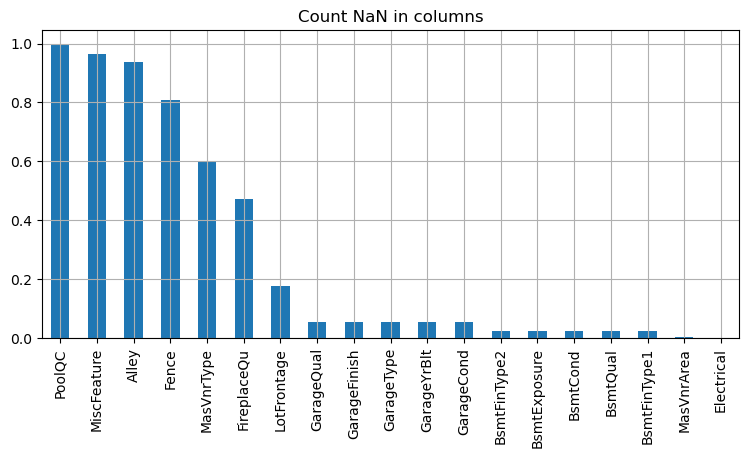

In [8]:
na.plot(kind="bar")
plt.title("Count NaN in columns")

## Обработка категорий

In [12]:
for c in cat_cols:
    df[c] = df[c].astype("category")

In [13]:
card = df[cat_cols].nunique().sort_values(ascending=False)
card

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond         5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
BldgType          5
FireplaceQu       5
LandContour       4
LotShape          4
KitchenQual       4
MiscFeature       4
Fence             4
BsmtCond          4
ExterQual         4
BsmtExposure      4
BsmtQual          4
LandSlope         3
PoolQC            3
GarageFinish      3
PavedDrive        3
MasVnrType        3
Utilities         2
Alley             2
Street            2
CentralAir        2
dtype: int64

In [16]:
for c in cat_cols:
    vc = df[c].value_counts(normalize=True)
    if "other" not in df[c].cat.categories:
        df[c] = df[c].cat.add_categories("other")
    df[c] = df[c].where(df[c].isin(vc[vc>=0.02].index), "other")
    #print(df[c].isin(["other"]).sum())

## Анализ цен

Text(0.5, 1.0, 'Target distribution')

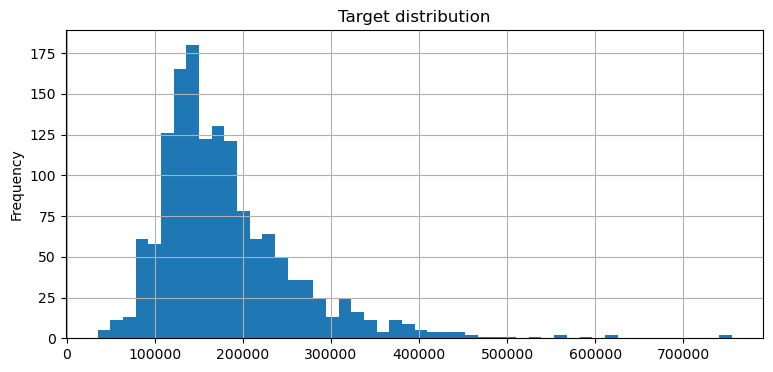

In [17]:
y_col = "SalePrice"
df[y_col].plot(kind="hist", bins=50)
plt.title("Target distribution")

Text(0.5, 1.0, 'log1p target distribution')

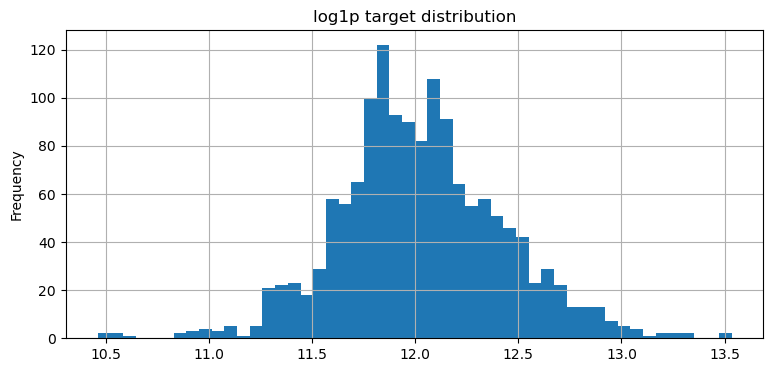

In [19]:
df["log_y"] = np.log1p(df[y_col])
df["log_y"].plot(kind="hist", bins=50)
plt.title("log1p target distribution")